In [72]:
%%capture
import pandas, copy
import numpy as np
from matplotlib import pyplot as plt
# from mpl_toolkits.axes_grid1.inset_locator import inset_axes zoom region

plt.figure(figsize=[12, 8], dpi=200)
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({"figure.figsize": (12, 8), "figure.dpi": 180})
fig1, ax1 = plt.subplots()
fig1.set_facecolor('white')

dotSurge = []
li = [None for i in range(8)]
liPoly = []

In [73]:
dataxy = []
ax1.clear()
ax1.grid()
ax1.xaxis.label.set_text(r"Time (sec)")
ax1.yaxis.label.set_text(r"Current (A)")
ax1.set_title("CHI660E Data | I-t Raw")


for chknum in range(1, 4 + 1):
    file="i-t-{}.txt".format(int(chknum))
    with open(file) as f:
        rawData = [strLines.split('\n')[0] for strLines in f.readlines()]
        realData = rawData[rawData.index("Time/sec, Current/A") + 2 :]
        realData = np.array([[float(j) for j in i.split(", ")] for i in realData])
        # selectData = realData[np.argwhere(realData == 200.0)[-1][0] :].T # equal to x-y
        selectData = realData[200 : ].T
        dataxy.append(selectData)

li[0] = ax1.plot(dataxy[0][0], dataxy[0][1], 'k-', label="1st")
li[1] = ax1.plot(dataxy[1][0], dataxy[1][1], '-', label="2nd", color='grey')
li[2] = ax1.plot(dataxy[2][0], dataxy[2][1], '-', label="3rd", color='salmon')
li[3] = ax1.plot(dataxy[3][0], dataxy[3][1], '-', label="4th", color='peru')

In [74]:
dotxy = []
for i in dotSurge:
    i.pop(0).remove()
for i in liPoly:
    i.pop(0).remove()
dotSurge = []
liPoly = []
dotPolyX = np.arange(150, 650, 0.1)
ax1.texts.clear()

for chknum in range(0, 4):
    boolData = np.diff(dataxy[chknum][1]) > 1e-6
    selectList = np.argwhere(boolData == True) + 1
    selectData = np.append(dataxy[chknum][0][selectList], dataxy[chknum][1][selectList], axis=1).T
    dotxy.append(selectData)
    dotSurge.append(ax1.plot(selectData[0], selectData[1], 's', color=li[chknum][0].get_color()))
    # dotPolyF = np.poly1d(np.polyfit(selectData[0], selectData[1], 1))
    # liPoly.append(ax1.plot(dotPolyX, dotPolyF(dotPolyX), '', color=li[chknum][0].get_color(), linewidth=.9))
    # ax1.text(dotPolyX[-500], dotPolyF(dotPolyX[-500]) , dotPolyF, 
    #     color=li[chknum][0].get_color(),
    #     backgroundcolor=(1,1,1,0.35),
    #     horizontalalignment='right',
    #     verticalalignment='top',
    #     rotation=np.rad2deg(np.arctan(dotPolyF[1] * 5e6))
    #     )

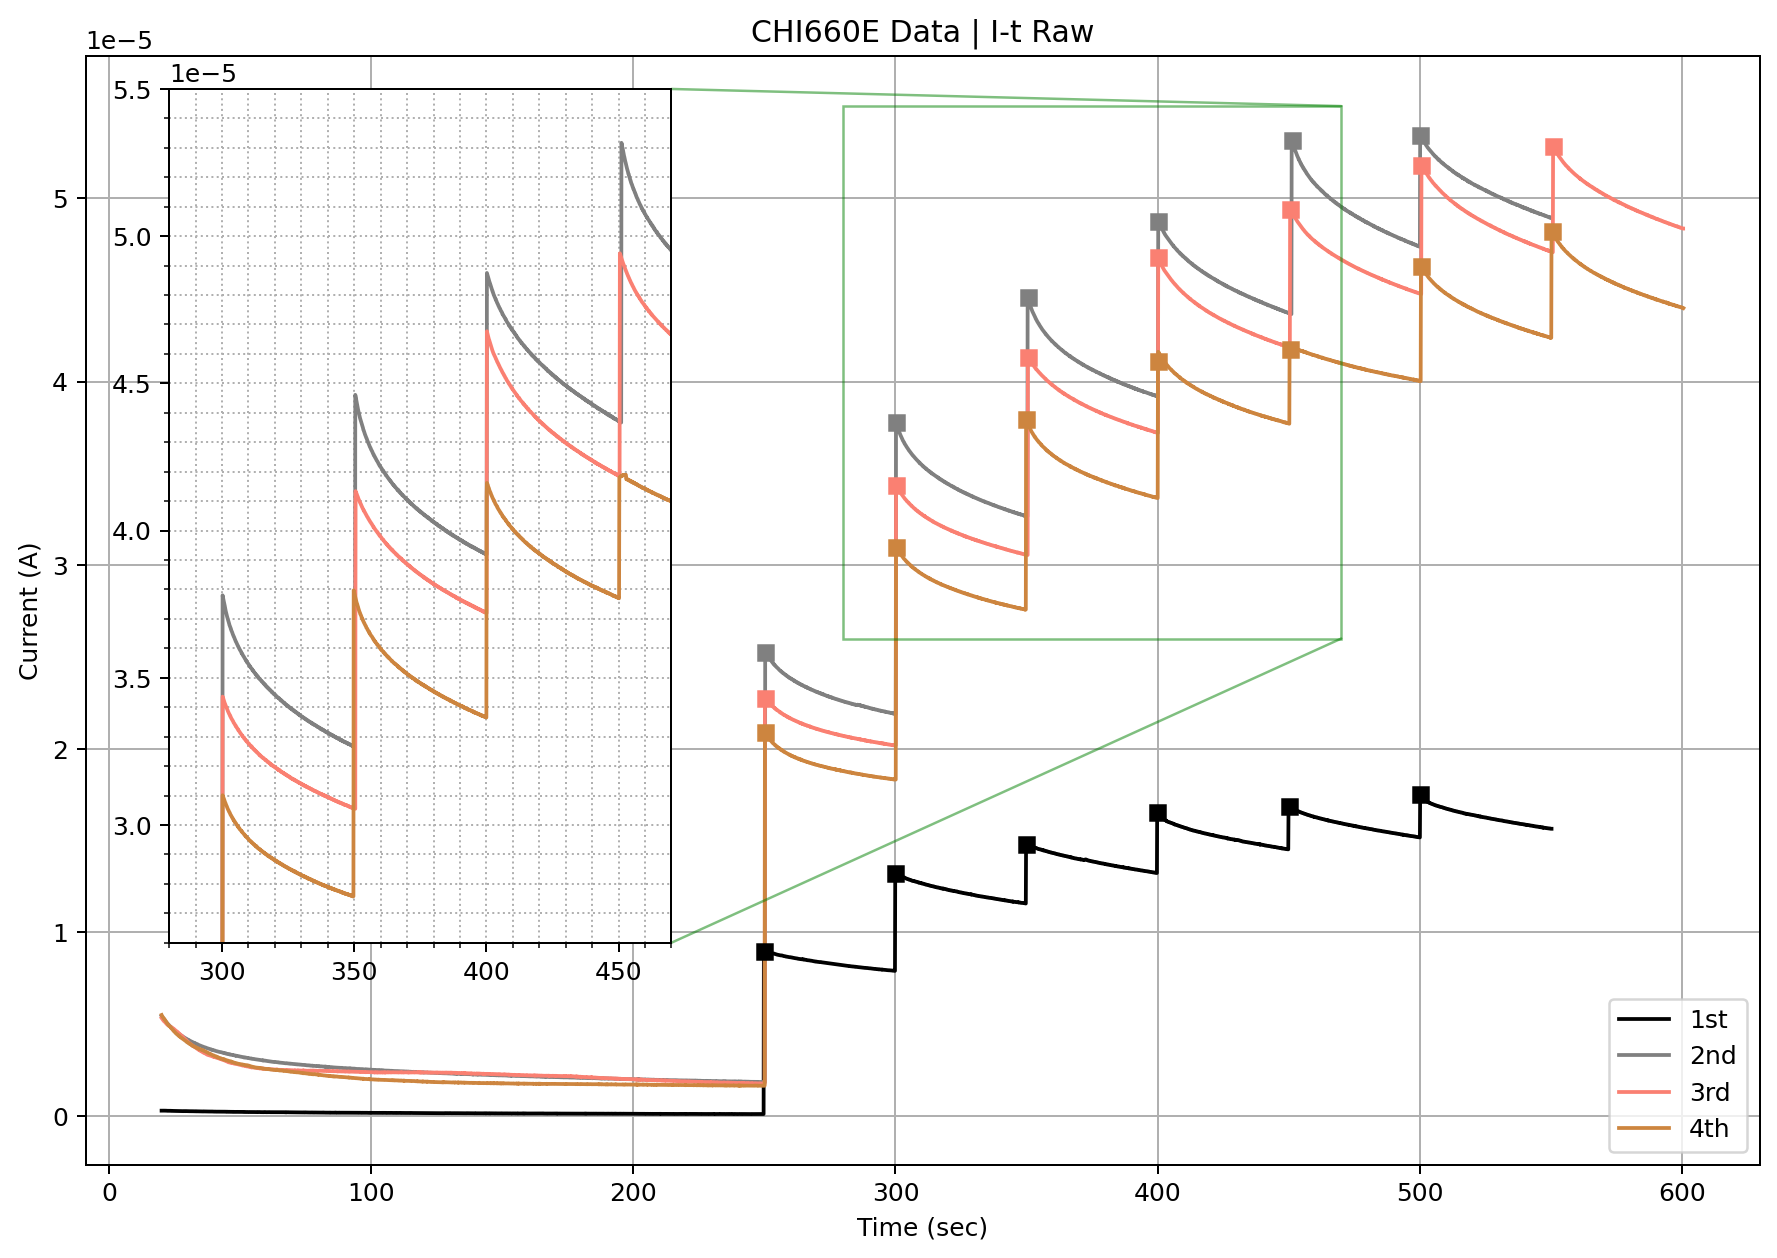

In [75]:
# li7 = ax1.plot(dataxy[8], dataxy[9], ':', label="7μL")
# plt.xlim([180, 620])
# plt.ylim([0, 6e-5])
ax2 = ax1.inset_axes([0.05, 0.2, 0.3, 0.77])
ax2.plot(dataxy[0][0], dataxy[0][1], 'k-', label="1st")
ax2.plot(dataxy[1][0], dataxy[1][1], '-', label="2nd", color='grey')
ax2.plot(dataxy[2][0], dataxy[2][1], '-', label="3rd", color='salmon')
ax2.plot(dataxy[3][0], dataxy[3][1], '-', label="4th", color='peru')
# ax2.add_child_axes(ax1)
# ax2.add_artist(copy.copy(ax1))
ax2.set_xlim([280, 470])
ax2.set_ylim([2.6e-5, 5.5e-5])
ax2.xaxis.set_minor_locator(plt.MultipleLocator(10))
ax2.yaxis.set_minor_locator(plt.MultipleLocator(1e-6))
ax2.grid(linestyle=':', which="both")
ax1.indicate_inset_zoom(ax2, edgecolor="green")
ax1.legend()
fig1

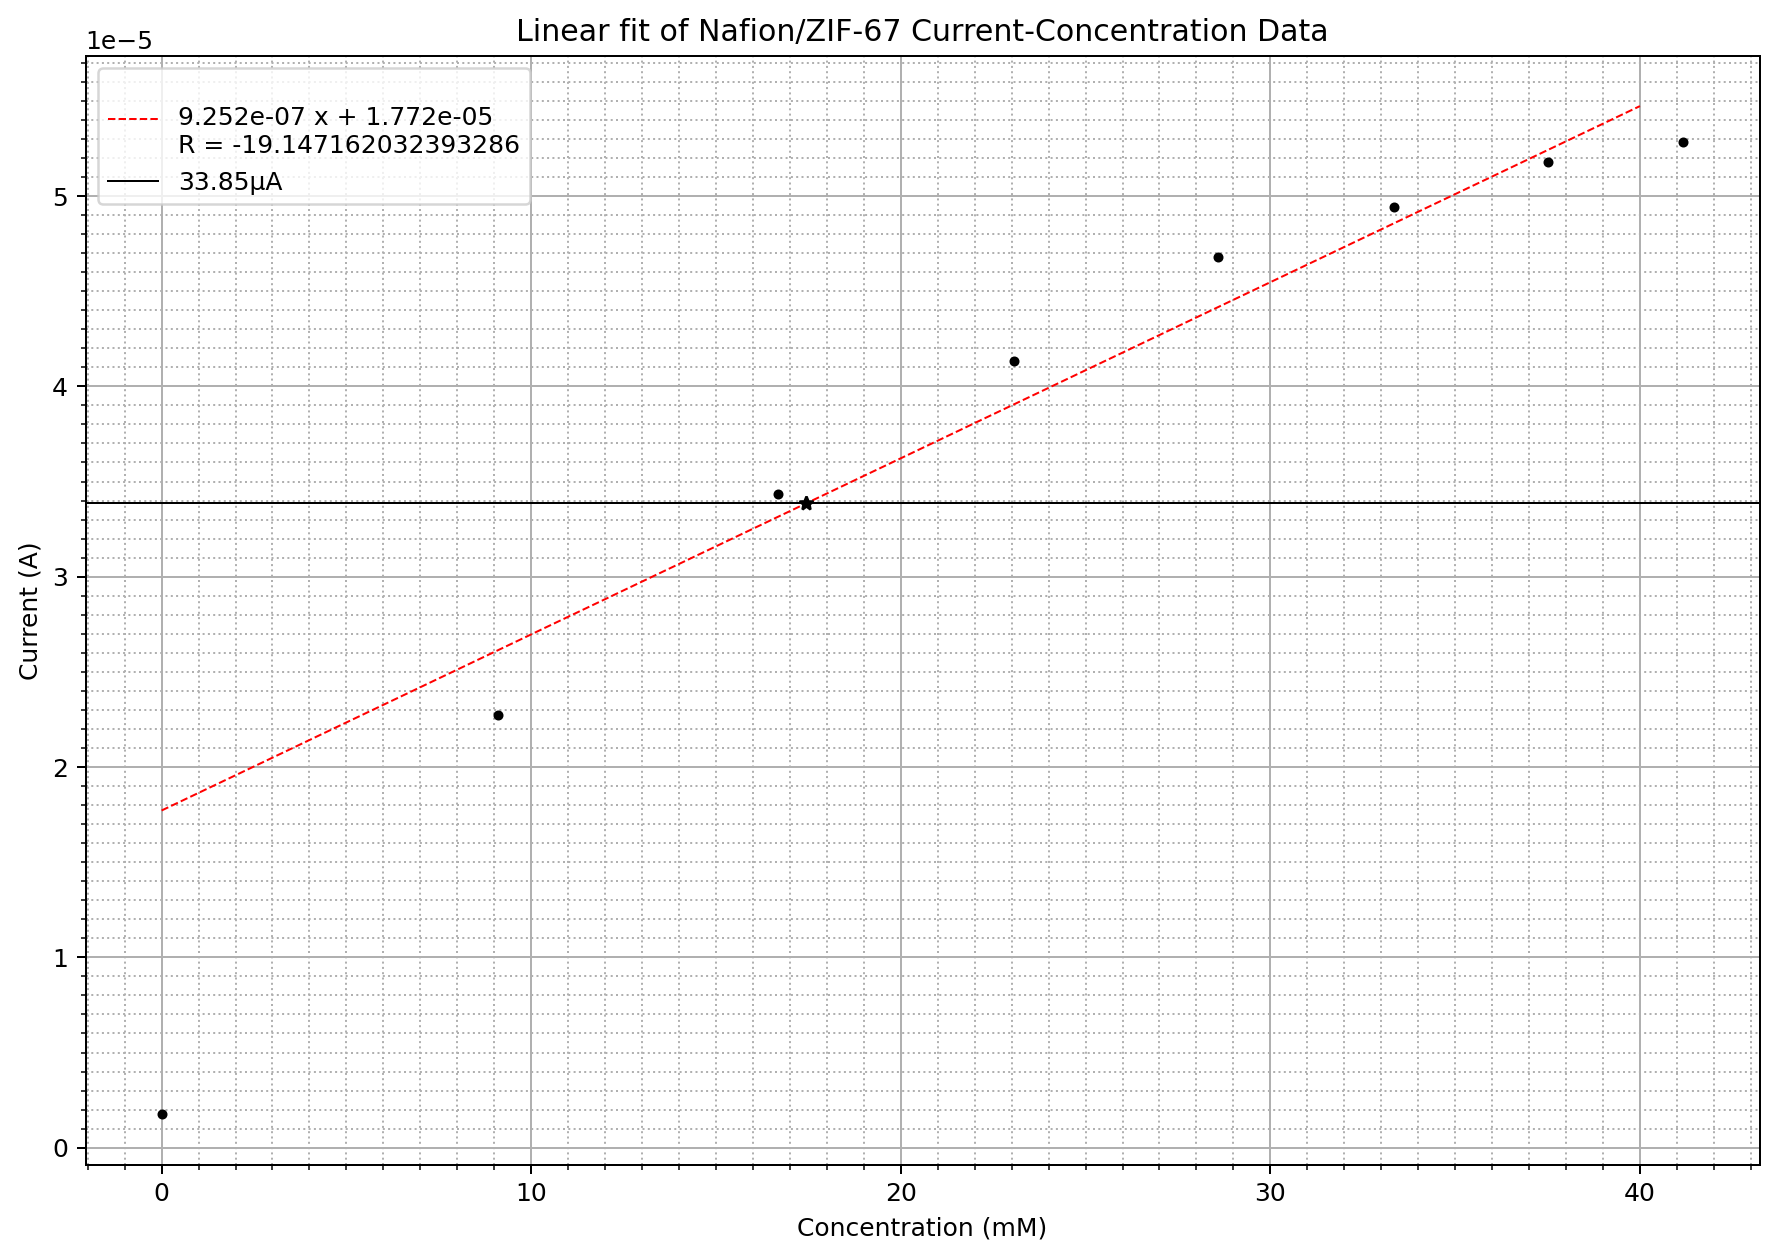

In [81]:

fig2, ax2 = plt.subplots()
fig2.set_facecolor('white')
ax2.xaxis.label.set_text(r"Concentration (mM)")
ax2.yaxis.label.set_text(r"Current (A)")
ax2.set_title("Linear fit of Nafion/ZIF-67 Current-Concentration Data")
dotXY = np.array([[0, 100 / 11, 200 / 12, 300 / 13, 400 / 14, 500 / 15, 600 / 16, 700 / 17], [1.764e-6, 2.274e-5, 3.436e-5, 4.134e-5, 4.677e-5, 4.942e-5, 5.179e-5, 5.284e-5]]) #3rd
ax2.plot(dotXY[0], dotXY[1], 'k.')

dotPolyX = np.linspace(0, 40, 1000)
dotPolyF = np.poly1d(np.polyfit(dotXY[0, 1:], dotXY[1, 1:], 1)) #omit [0, data]
ax2.plot(dotPolyX, dotPolyF(dotPolyX), 'r--', linewidth=.8, label="{}\nR = {}".format(dotPolyF, dotPolyF.r[0]))
ax2.axhline(3.385e-5, linewidth=.8, color='k', label='33.85μA')
ax2.plot(17.4340683096, 3.385e-5, 'k*')
ax2.xaxis.set_minor_locator(plt.MultipleLocator(1))
ax2.yaxis.set_minor_locator(plt.MultipleLocator(1e-6))
ax2.grid(linestyle=':', which='minor')
ax2.grid(linestyle='-', which='major')
ax2.legend()
# dotPolyF = np.poly1d(np.polyfit(dotXY[0], dotXY[1], 1))
# ax2.plot(dotPolyX, dotPolyF(dotPolyX), 'r--', linewidth=.8)
fig2